Procedemos a estudiar la variable objetivo de producción de cultivo (unidades = kgs) Vamos a hacer una búsqueda de outliears para dicha variable, identificando aquellos valores que se alejen mucho de la media y desviación típica.

In [58]:
import random
import pandas as pd
import numpy as np

In [59]:

# PRODUCCIÓ TARGET

target = pd.read_csv('./data/target_PROD.csv')

y = target[['PROD']]

y = list(target['PROD'])

y

[31595,
 3285,
 2581,
 13155,
 2487,
 0,
 3843,
 2537,
 14912,
 10374,
 5482,
 6076,
 4489,
 1235,
 12240,
 10599,
 4426,
 691,
 5631,
 2173,
 1729,
 12134,
 3248,
 4940,
 4322]

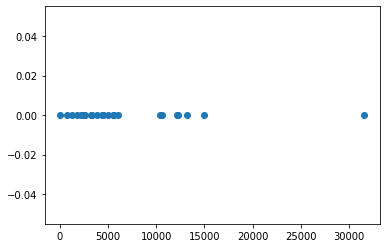

In [60]:
import matplotlib.pyplot as plt

# PLOT 1-D data

plt.scatter(y,[0] * len(y))

plt.show()

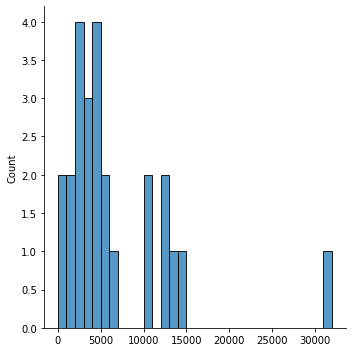

In [61]:
# DISTRIBUTION:

import seaborn as sns

sns.displot(y , binwidth=1000)

In [62]:
# para una búsqueda sencilla y automática de outliers realizamos el siguiente proceso utilizando una distribución normal.

import numpy as np

mean = np.mean(y)
std = np.std(y)

print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 6567.36
std. deviation is 6569.716242761174


Z-SCORE OUTLIERS

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

https://en.wikipedia.org/wiki/Standard_score

In [63]:
threshold = 3

outlier = []

for i in y:

    z = (i-mean)/std

    if z > threshold:

        outlier.append(i)
        
print('outlier in dataset is', outlier)

outlier in dataset is [31595]


In [64]:
# los valores anteriores son candidatos a eliminarse de la tabla.

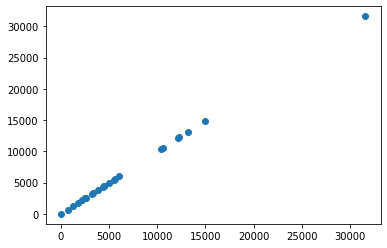

In [65]:
# damos valores 2-d dimensionales para visualizar los datos:

x = y
y = y

df = pd.DataFrame({'x':x, 'y':y})

df

plt.scatter(df['x'], df['y'])

In [66]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(gamma='auto', kernel='linear', nu=0.1).fit(df)

clf.predict(df)

clf.score_samples(df)

array([82684115.00000006,  8596845.00000001,  6754477.00000001,
       34426635.00000003,  6508479.00000001,        0.        ,
       10057131.00000001,  6639329.00000001, 39024704.00000003,
       27148758.00000002, 14346394.00000001, 15900892.00000001,
       11747713.00000001,  3231995.        , 32032080.00000003,
       27737583.00000002, 11582842.00000001,  1808347.        ,
       14736327.00000001,  5686741.        ,  4524793.        ,
       31754678.00000003,  8500016.00000001, 12927980.00000001,
       11310674.00000001])